# Expertiments with directed and undirected graphs

( This is done using my sage310 or kerasenv3.10.6 environment )

In [1]:
%matplotlib inline

import scipy
import scipy.io
import pickle
import numpy as np
from scipy.spatial.distance import pdist, squareform
import networkx as nx
import matplotlib.pyplot as plt
from random import choice
import seaborn as sns
import time
from sklearn.decomposition  import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import sklearn as sk
import random
import pprint
import numpy as np
import warnings




import helper_common_files as HCF


rand_state = 42
np.random.seed(rand_state)



In [2]:
kcorre_names = ( '1orbit-2-corre-dict', '1orbit-3-corre-dict', '1orbit-4-corre-dict', '1orbit-5-corre-dict', '1orbit-6-corre-dict') 
max_k = HCF.find_maximum_number(kcorre_names)

handle = open('dataset-all-graphs/megadump-atlas_7.pickle', 'rb')


raw_dataset = pickle.load(handle)
handle.close()
dataset = raw_dataset[1]


Pollute with non-isomorphic graphs the dataset and check for the pollution.

In [3]:
non_isomorphic_graphs = len(raw_dataset[0])


print("Number of non-isomorphic graphs: ", non_isomorphic_graphs)

#### POLLUTE WITH NON-ISOMORPHIC
#raw_dataset = HCF.pollute_with_isomorphic_graphs(raw_dataset, 40, kcorre_names)


isomorphic_graphs = HCF.find_isomorphic_graphs(raw_dataset[0])
print("Number of isomorphic grpahs", len(isomorphic_graphs))
print("They are:")
pprint.pprint(isomorphic_graphs)

Number of non-isomorphic graphs:  1044
Number of isomorphic grpahs 0
They are:
[]


Let's create the table that is used to build the graph data structure

In [4]:
# Are you sure you want to run this? Very slow. 
##### TRIGGER LENTEZZA!!!
T_test = HCF.create_T_table_2(dataset, kcorre_names)


##### THIS IS THE FAST ALGORITHM
T, T_dictionary = HCF.create_T_table(dataset, kcorre_names)
##### TODO MAYBE WE SHOULD TRUNCATE INSIDE THIS FUNCTION


print(T_test["1orbit-2-corre-dict"])


found it in else
found it in else
found it in else
found it in else
found it in else
[{325, 317}, {1029}, {107}, {986}, {11}, {811}, {65}, {801}, {940, 941, 943}, {526}, {541}, {256, 255}, {992}, {532}, {1028}, {84}, {113}, {499, 493}, {252}, {77, 78, 79}, {598}, {52, 53}, {648, 649, 650, 651, 656, 659, 664}, {216, 217}, {155}, {611, 612, 613, 617, 620}, {1022}, {353, 356, 351}, {732}, {626, 628, 634}, {453, 441, 442, 443, 446}, {516, 500, 501, 502, 503, 507, 511}, {520, 521, 518, 519}, {577, 574}, {311}, {1025}, {640, 641, 629, 630, 631, 632}, {993}, {878, 879}, {495}, {594, 595, 597}, {625, 627, 633}, {911}, {737, 738, 739}, {390}, {184, 186}, {200, 194, 191}, {750, 755, 758, 759, 763, 764}, {583}, {198}, {609, 610, 623}, {203, 205, 206, 207}, {635}, {924, 925}, {289, 290}, {643, 644, 645}, {187}, {654, 655, 658, 661, 663}, {298}, {866, 867}, {665, 653}, {560, 561, 563}, {504, 512, 514, 510}, {87}, {825}, {705}, {952, 950}, {271}, {401, 398}, {675}, {897, 891, 892, 893}, {913}, {681}

In [6]:
#print(T_test["1orbit-3-corre-dict"])
#print(T["1orbit-3-corre-dict"])

array1_ = np.array(T["1orbit-2-corre-dict"])
array2_ = np.array(T_test["1orbit-2-corre-dict"])


conflict1 = [x for x in array1_ if x not in array2_]    
conflict2 = [x for x in array2_ if x not in array1_]    

# print(T["1orbit-2-corre-dict"])
# print("uhf")
# print(array2_)  
print("len of conflit", len(conflict1), len(conflict2))
print(" ")
print(conflict1)
print(conflict2) 


#print(raw_dataset[0][conflict1[0].pop()].to_numpy_matrix()  ) 
print(np.allclose(dataset["1orbit-2-corre-dict"][253], dataset["1orbit-2-corre-dict"][266]))
print(np.linalg.norm(dataset["1orbit-2-corre-dict"][253] - dataset["1orbit-2-corre-dict"][266]))

print(T["1orbit-2-corre-dict"])

vector_tuple = tuple(np.round(dataset["1orbit-2-corre-dict"][253], decimals=6))
vector_tuple_ = tuple(np.round(dataset["1orbit-2-corre-dict"][266] , decimals=6))

if vector_tuple_ in T_dictionary["1orbit-2-corre-dict"]:
    print("is present") 
if vector_tuple in T_dictionary["1orbit-2-corre-dict"]:
    print("is present") 

# if vector_tuple in T["1orbit-2-corre-dict"]:
#     # If the vector representation exists in the dictionary, append the index
#     print("is present")
# else:
#     # Oth.. create a new entry with the index
#     print("is not present")

# if vector_tuple_ in T["1orbit-2-corre-dict"]:
#     # If the vector representation exists in the dictionary, append the index
#     print("is present")
# else:
#     # Oth.. create a new entry with the index
#     print("is not present")


T_tmp = {}
T_sets = {}

for kcorre_name in kcorre_names:

    T_tmp[kcorre_name]={}

    # Iterate through the skew_spectra and populate the dictionary
    for index, vector in enumerate(dataset[kcorre_name]):
        #print(index)
        # Convert the vector to a tuple to use it as a dictionary key :) 
        vector_tuple_tmp = tuple(np.round(vector, decimals=6))

        if vector_tuple_tmp in T_tmp[kcorre_name]:
            # If the vector representation exists in the dictionary, append the index
            T_tmp[kcorre_name][vector_tuple_tmp].append(index)
            if index==253 or index==266:
                print(index, kcorre_name, "found it in if")
        else:
            if index==253 or index==266:
                print(index, kcorre_name, "found it in else")
            # Oth.. create a new entry with the index
            T_tmp[kcorre_name][vector_tuple_tmp] = [index]

        if vector_tuple_tmp in T_tmp[kcorre_name]:
            # If the vector representation exists in the dictionary, append the index
            if index==253 or index==266:
                print(index, kcorre_name, "(second round) found it in if")
        else:
            if index==253 or index==266:
                print(index, kcorre_name, "(second round) found it in else")
            # Oth.. create a new entry with the index






len of conflit 0 0
 
[]
[]
True
1.4119195e-06
[{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12}, {13}, {14}, {15}, {16}, {17}, {18}, {19}, {20}, {21}, {22}, {23}, {24}, {25}, {26}, {27}, {28}, {29}, {30}, {32, 31}, {33}, {34}, {35}, {36}, {37}, {38}, {39}, {40}, {41}, {42}, {43}, {44}, {45}, {46}, {47}, {48}, {49}, {50}, {51}, {52, 53}, {54}, {55}, {56, 57}, {58}, {59, 60}, {61}, {62}, {63}, {64}, {65}, {66}, {67}, {68}, {69}, {73, 70}, {71}, {72, 75}, {74}, {76}, {77, 78, 79}, {80}, {81}, {82}, {83}, {84}, {85}, {86}, {87}, {88}, {89}, {90}, {91}, {92}, {93}, {94}, {95}, {96, 99}, {97}, {98}, {100}, {104, 101, 103}, {102}, {105}, {106}, {107}, {108}, {109}, {110}, {111}, {112, 115}, {113}, {114}, {116}, {117}, {120, 118}, {119}, {121}, {122, 123}, {124}, {125}, {126}, {128, 130, 127}, {129, 137, 138}, {131, 132, 135}, {133, 134}, {136}, {139, 143}, {140, 141, 142}, {144, 145}, {146}, {147}, {148}, {149}, {150}, {151}, {152}, {153}, {154}, {155}, {156}, {157}, {158}, 

Create graph data structure from table

In [7]:
G = HCF.build_networkx_graph(T, maxk=5)


### TESTING EVEN FURTHER THE EQUIVALENCE BETWEEN THE TWO GRAPHS
G_test = HCF.build_networkx_graph(T_test, maxk=5)
print(nx.is_isomorphic(G, G_test))




True


Let's find nodes or edges that are not linked to the main tree.

In [8]:
G_bfs = nx.bfs_tree(G, (0,0))
print("Number of nodes in original graph: {}, number of nodes in the BDF: {}".format(G.number_of_nodes(), G_bfs.number_of_nodes()))
print("Number of edges in original graph: {}, number of edgs in the BDF: {}".format(G.number_of_edges(), G_bfs.number_of_edges()))

Number of nodes in original graph: 4868, number of nodes in the BDF: 4868
Number of edges in original graph: 4882, number of edgs in the BDF: 4867


What's left in the graph if we remove the BFS?

In [9]:
G_leftover = HCF.graph_subtraction_nodes(G, G_bfs)

try:
    random_node = choice(list(G_leftover.nodes))
    print(random_node)
except Exception as e:
    print(e)

list index out of range


In [10]:
print("The G_bfs is a DAG?: ", nx.is_directed_acyclic_graph(G_bfs))

print("The G_bfs is a Tree?: ", nx.is_tree(G_bfs))

print("The G is a DAG?: ", nx.is_directed_acyclic_graph(G))

print("The G is a Tree?: ", nx.is_tree(G))


The G_bfs is a DAG?:  True
The G_bfs is a Tree?:  True
The G is a DAG?:  True
The G is a Tree?:  False


## Let's plot the tree! 

You can play with different numbe of iterations and figsize

In [10]:
#pos = nx.spring_layout(G_bfs, iterations=50)
#plt.figure(figsize=(200,200)) 
#nx.draw(G_bfs, pos,  with_labels=True, font_size=8)

In [11]:
#pos = nx.spring_layout(G_bfs, iterations=100)
#plt.figure(figsize=(200,200)) 
#nx.draw(G_bfs, pos,  with_labels=True, font_size=8)

## Do we gain distinguishing capabilities increasing k for the k-reduced-skew-spectrum?
YES!
### Lottery ticket: nodes with a split at depth k> 2

In [11]:
histogram, hits, lottery_tickets = HCF.count_bifurcations(G, kcorre_names)       

print("We have {} lottery tickets, i.e. nodes with a split at depth k>3 \n\n".format(len(lottery_tickets)))

pprint.pprint(histogram)

print("The number of nodes is ", G_bfs.number_of_nodes())
print("The number of graphs is ", len(raw_dataset[0]))

try:
    lottery_ticket = random.choice(lottery_tickets)
except Exception as e:
    pass

print("\n\nThe lottery tickets are:")
print(lottery_tickets)


We have 2 lottery tickets, i.e. nodes with a split at depth k>3 


{'1orbit-0-corre-dict': 712,
 '1orbit-2-corre-dict': 518,
 '1orbit-3-corre-dict': 4,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0}
The number of nodes is  4868
The number of graphs is  1044


The lottery tickets are:
[(3, 417, 419), (3, 555, 556)]


In [12]:
try:
    print("Are the two graph isomorphic? (We believe not, as they can be distinguished k+1 correlation):", nx.is_isomorphic(raw_dataset[0][lottery_ticket[1]], raw_dataset[0][lottery_ticket[2]]))
    print("Are the 3-correlations the same?", np.allclose(raw_dataset[1]['1orbit-3-corre-dict'][lottery_ticket[1]], raw_dataset[1]['1orbit-3-corre-dict'][lottery_ticket[2]]))
    print("Are the 4-correlations the same?",  np.allclose(raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[1]], raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[2]]))
    print("Let's print the difference between the two 4 correlations")
    print(raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[1]]- raw_dataset[1]['1orbit-4-corre-dict'][lottery_ticket[2]])
except Exception as e:
    print(e)
    pass

Are the two graph isomorphic? (We believe not, as they can be distinguished k+1 correlation): False
Are the 3-correlations the same? True
Are the 4-correlations the same? False
Let's print the difference between the two 4 correlations
[ 0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.      

Let's plot some of those lottery tickets

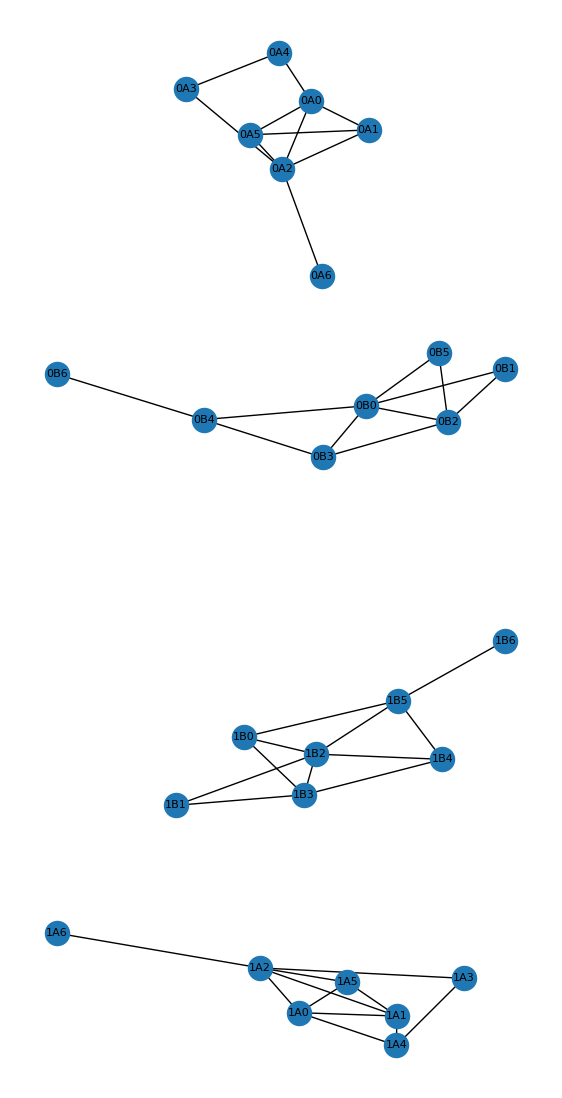

In [12]:
if len(lottery_tickets) > 0:    
    fig, axs = plt.subplots(nrows=len(lottery_tickets), figsize=(7, 7*len(lottery_tickets)))
    for i, ticket in enumerate(lottery_tickets):
        newgraph = nx.union(raw_dataset[0][ticket[1]], raw_dataset[0][ticket[2]], rename=("{}A".format(i), "{}B".format(i)))
        pos = nx.spring_layout(newgraph, iterations=20)
        #plt.figure(figsize=(7,7)) 
        #axs[i].imshow()
        nx.draw(newgraph, pos,  with_labels=True, font_size=8, ax=axs[i])

## Let's find graphs that we cannot distinguish in all the levels

In [14]:
non_singleton_nodes = {i:[] for i in range(7)}

for node in G:
    if len(node) > 2:
        non_singleton_nodes[node[0]].append(node)

print("The non singleton nodes are: ")
pprint.pprint(non_singleton_nodes)

The non singleton nodes are: 
{0: [],
 1: [],
 2: [(2, 32, 31),
     (2, 52, 53),
     (2, 56, 57),
     (2, 59, 60),
     (2, 73, 70),
     (2, 72, 75),
     (2, 77, 78, 79),
     (2, 96, 99),
     (2, 104, 101, 103),
     (2, 112, 115),
     (2, 120, 118),
     (2, 122, 123),
     (2, 128, 130, 127),
     (2, 129, 137, 138),
     (2, 131, 132, 135),
     (2, 133, 134),
     (2, 139, 143),
     (2, 140, 141, 142),
     (2, 144, 145),
     (2, 162, 165),
     (2, 168, 169, 166),
     (2, 184, 186),
     (2, 195, 189, 199),
     (2, 200, 194, 191),
     (2, 192, 201),
     (2, 193, 202, 196),
     (2, 203, 205, 206, 207),
     (2, 208, 209),
     (2, 218, 220, 212, 222),
     (2, 213, 214, 215),
     (2, 216, 217),
     (2, 233, 228, 223),
     (2, 224, 225, 227, 231),
     (2, 226, 230),
     (2, 232, 229),
     (2, 234, 235),
     (2, 242, 236, 237, 238),
     (2, 240, 241, 239),
     (2, 266, 253),
     (2, 256, 255),
     (2, 260, 261),
     (2, 262, 263),
     (2, 273, 274),
     (

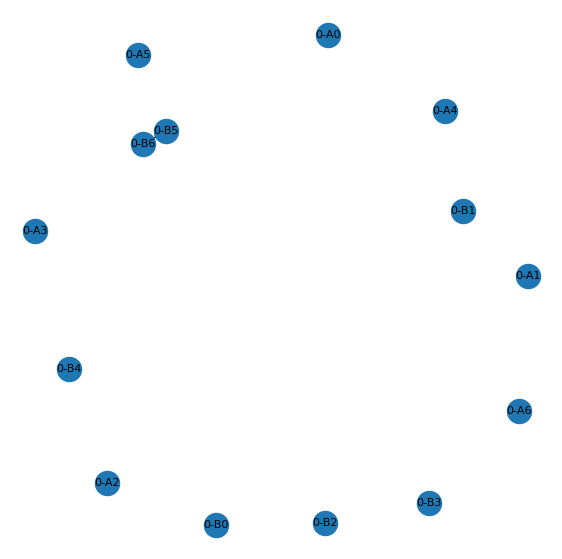

In [15]:
limit = 5
selected_k = 4

fig, axs = plt.subplots(nrows=len(non_singleton_nodes[selected_k][:limit]), figsize=(7, 7*len(non_singleton_nodes[selected_k][:limit])))
for i, ticket in enumerate(non_singleton_nodes[selected_k][:limit]):
    newgraph = nx.union(raw_dataset[0][ticket[1]], raw_dataset[0][ticket[2]], rename=("{}-A".format(i), "{}-B".format(i)))
    pos = nx.spring_layout(newgraph, iterations=50)
    nx.draw(newgraph, pos, ax=axs,  with_labels=True, font_size=8)
    #nx.draw(newgraph, pos, ax=axs[i],  with_labels=True, font_size=8)
    # If there is more then one non_singleton_nodes[selected_k] we need to use axs[i] instead of axs



## Limitations of the krsksp



Let's look at the leaves. There might be leaves with n at any layer (if we made error building the graph), and leaves at layer k=$maxk. Let's 

In [16]:
leaves = [x for x in G.nodes() if G.out_degree(x)==0]
print("Number of leaves", len(leaves))

non_separated_leaves = [x for x in G.nodes() if G.out_degree(x)==0 and len(x) > 2]  
print("Number of non separated leaves at any level: {}".format(len(non_separated_leaves)))
print(non_separated_leaves)

non_separated_leaves_lastk = [x for x in G.nodes() if G.out_degree(x)==0 and len(x) > 2 and x[0]==max_k] 
print("Number of non separated leaves at last layer 6: {}".format(len(non_separated_leaves_lastk)))
print(non_separated_leaves_lastk)

print('')


paths = nx.all_simple_paths(G, (0,0), (6, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 22, 57, 58))
paths = [path for path in paths]
print("The number of paths is: ", len(paths))
print("The paths are: ")
pprint.pprint(paths)

Number of leaves 1029
Number of non separated leaves at any level: 2
[(6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61), (6, 32, 39)]
Number of non separated leaves at last layer 6: 2
[(6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61), (6, 32, 39)]

The number of paths is:  0
The paths are: 
[]


### Finding collisions: nodes with indegree > 1

In [17]:
histogram, non_singleton_nodes = HCF.count_collisions(G, kcorre_names)      


print("Total indegree of collisions for each k")
pprint.pprint(histogram)
print("\n")
print("Recall the number of nodes with indegree bigger than 1 is: ", len(non_singleton_nodes))
print("\n")

try:
    hit = random.choice(hits)
    print("Random collision: {}".format(hit))
except Exception as e:
    print("Cannot find a collision:", e)


print("\nAll collisions:")
pprint.pprint(non_singleton_nodes)


NameError: name 'hack' is not defined

### Let's look at the edges that are in the graph but not in the tree.

Thus should return similar information to the cells above, i.e. edges that are creating collisions.

In [18]:
# Remove G_Bfs from G
G_leftover_edges = HCF.graph_subtraction_edges(G, G_bfs)

print("The nuber of edges that we removed is: {}.".format(len(G_leftover_edges.edges())))

for edge in G_leftover_edges.edges():
    print(edge)


The nuber of edges that we removed is: 15.
((5, 2), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 5), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 7), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 11), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 15), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 17), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 18), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 25), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 34), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 36), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 61), (6, 0, 1, 2, 3, 34, 5, 36, 7, 8, 11, 15, 17, 18, 25, 61))
((5, 39), (6, 32, 39))
((4, 3), (5, 0, 1, 3, 8))
((4, 8), (5, 0, 1, 3, 8))
((3, 1), (4, 0, 1))


##  Plotting histograms


[726, 1042, 1043, 1041, 1029]
1044


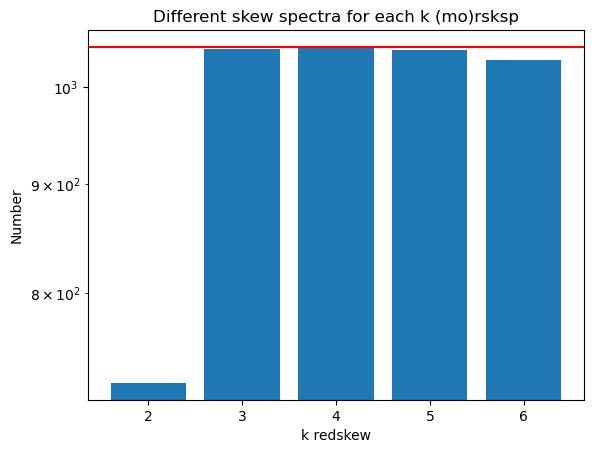

In [19]:
number_differe_kredskew = []
for kcorre_name in kcorre_names:
    number_differe_kredskew.append(len(set(tuple(np.round(row, decimals=6)) for row in dataset[kcorre_name])))

print(number_differe_kredskew)
print(non_isomorphic_graphs)

numeric_part = [name.split('-')[1] for name in kcorre_names]
plt.bar(numeric_part, number_differe_kredskew)
    
plt.axhline(y = non_isomorphic_graphs, color = 'r', linestyle = '-')     # non isomorphic graphs set at the beginning of the notebook

plt.xlabel('k redskew')
plt.ylabel('Number')
plt.yscale("log") 
plt.title('Different skew spectra for each k (mo)rsksp')

plt.show()

In [ ]:
[723, 1042, 1043, 1041, 1029]
1044


CHECK WHY 1044 vs 1043 if there is a bug or is consistent with the rest of the things. 

SyntaxError: invalid syntax (3328620191.py, line 5)

Dataset path:  dataset-all-graphs/megadump-atlas_7.pickle
Number of total graphs:  1044
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
1orbit-2-corre-dict - comp. dist -  (finished clustering)
1orbit-3-corre-dict - comp. dist -  (finished clustering)
1orbit-4-corre-dict - comp. dist -  (finished clustering)
1orbit-5-corre-dict - comp. dist -  (finished clustering)
1orbit-6-corre-dict - comp. dist -  (finished clustering)
1orbit-7-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 4868, number of nodes in the BFS: 4868
Number of edges in original graph: 4882, number of edgs in the BFS: 4867
We have 2 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'1orbit-0-corre-dict': 712,
 '1orbit-2-corre-dict': 518,
 '1orbit-3-corre-dict': 4,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0,
 '1orbit-7-corre-dict': 0}


The lottery tickets are:

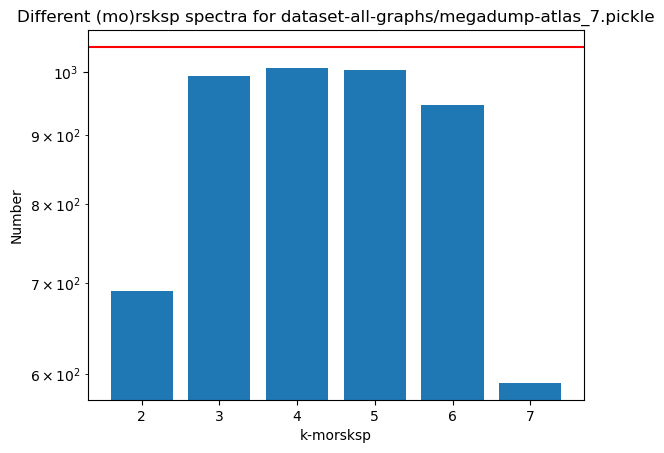

Dataset path:  datasets-random-graphs/so-megadump-random-graphs-features-1000-10-0.1.pickle
Number of total graphs:  1000
Number of isomorphic grpahs 40
They are:
[[0, 205],
 [1, 25, 60, 169, 178, 190, 319, 454, 735, 815, 958],
 [2, 404, 861, 897],
 [7, 562, 774],
 [9, 425],
 [11, 35, 123, 132, 234, 522, 685],
 [14, 69, 296, 393],
 [15, 369, 553],
 [16, 217, 514],
 [18, 107],
 [16,
  22,
  64,
  68,
  94,
  116,
  122,
  143,
  151,
  153,
  168,
  182,
  187,
  223,
  225,
  228,
  232,
  262,
  270,
  291,
  292,
  296,
  306,
  319,
  330,
  368,
  386,
  391,
  429,
  434,
  437,
  438],
 [25, 392],
 [7,
  8,
  25,
  28,
  60,
  70,
  86,
  120,
  129,
  150,
  185,
  189,
  196,
  235,
  253,
  258,
  261,
  273,
  275,
  365],
 [30, 45, 51, 57, 106, 125, 140, 162, 186, 195, 270, 289, 293],
 [33,
  35,
  51,
  63,
  82,
  85,
  86,
  94,
  105,
  124,
  127,
  129,
  142,
  148,
  160,
  176,
  181,
  201,
  213,
  217,
  243,
  244],
 [4, 36, 68],
 [18, 22, 23, 37, 86, 100, 110, 

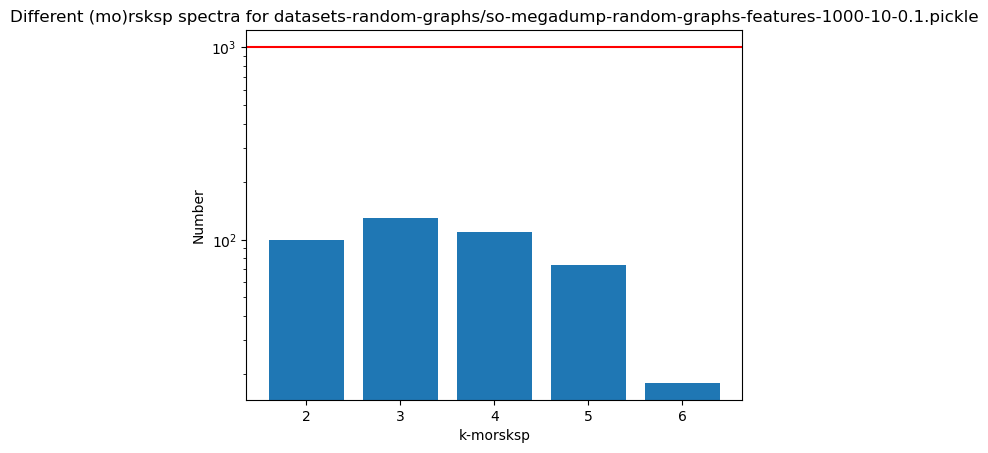

Dataset path:  datasets-random-graphs/mo-megadump-random-graphs-features-1000-10-0.1.pickle
Number of total graphs:  1000
Number of isomorphic grpahs 30
They are:
[[1,
  44,
  67,
  123,
  166,
  175,
  177,
  332,
  360,
  392,
  400,
  424,
  461,
  498,
  518,
  524,
  559,
  648,
  654,
  684,
  697,
  732,
  737,
  742,
  808,
  819],
 [4, 433, 829, 830],
 [5, 225, 369, 539],
 [6,
  175,
  178,
  194,
  223,
  269,
  319,
  350,
  384,
  697,
  740,
  790,
  811,
  815,
  825,
  841,
  845],
 [9, 88, 115, 197, 273, 311, 367, 402, 413, 422, 472, 531, 595, 787, 791],
 [11, 91, 186, 211, 222, 403, 503, 653, 683, 739],
 [12, 210, 507, 590, 670],
 [14, 503, 634],
 [16, 107, 224, 333, 365, 379, 416, 421, 473, 515, 586, 612],
 [0, 28, 33, 41, 76, 99, 137, 191, 202, 350],
 [27, 31, 36, 70, 92, 129, 182, 192, 339],
 [19, 38, 88, 100, 115, 155, 184, 187, 226, 252, 276, 278],
 [1, 19, 32, 39, 76, 156, 165, 205, 281],
 [32, 40, 67, 71, 105, 115, 129, 187, 206, 232, 284],
 [43, 219],
 [47, 175

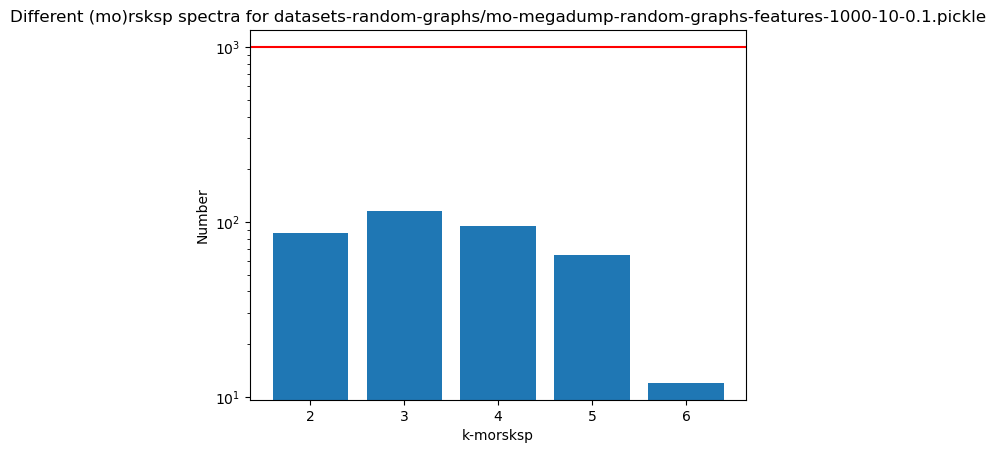

Dataset path:  datasets-random-graphs/so-megadump-random-graphs-features-1000-10-0.5.pickle
Number of total graphs:  1000
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
1orbit-2-corre-dict - comp. dist -  (finished clustering)
1orbit-3-corre-dict - comp. dist -  (finished clustering)
1orbit-4-corre-dict - comp. dist -  (finished clustering)
1orbit-5-corre-dict - comp. dist -  (finished clustering)
1orbit-6-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 4438, number of nodes in the BFS: 4438
Number of edges in original graph: 4505, number of edgs in the BFS: 4437
We have 25 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'1orbit-0-corre-dict': 651,
 '1orbit-2-corre-dict': 463,
 '1orbit-3-corre-dict': 51,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0}


The lottery tickets are:
[(3, 27, 822), (3, 299, 308, 534, 215), (3, 91, 

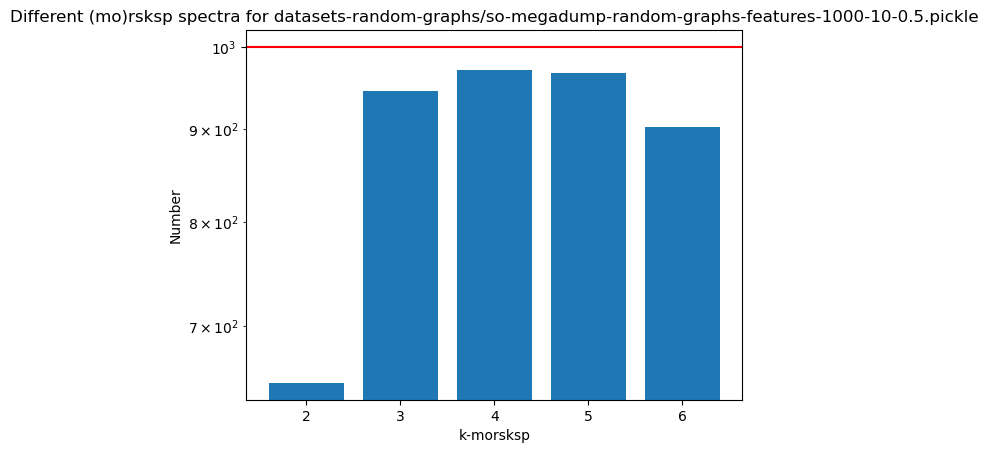

Dataset path:  datasets-random-graphs/mo-megadump-random-graphs-features-1000-10-0.5.pickle
Number of total graphs:  1000
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
2orbit-2-corre-dict - comp. dist -  (finished clustering)
2orbit-3-corre-dict - comp. dist -  (finished clustering)
2orbit-4-corre-dict - comp. dist -  (finished clustering)
2orbit-5-corre-dict - comp. dist -  (finished clustering)
2orbit-6-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 4401, number of nodes in the BFS: 4401
Number of edges in original graph: 4460, number of edgs in the BFS: 4400
We have 29 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'2orbit-0-corre-dict': 629,
 '2orbit-2-corre-dict': 468,
 '2orbit-3-corre-dict': 62,
 '2orbit-4-corre-dict': 0,
 '2orbit-5-corre-dict': 0,
 '2orbit-6-corre-dict': 0}


The lottery tickets are:
[(3, 72, 695), (3, 619, 527), (3, 205, 670), (3,

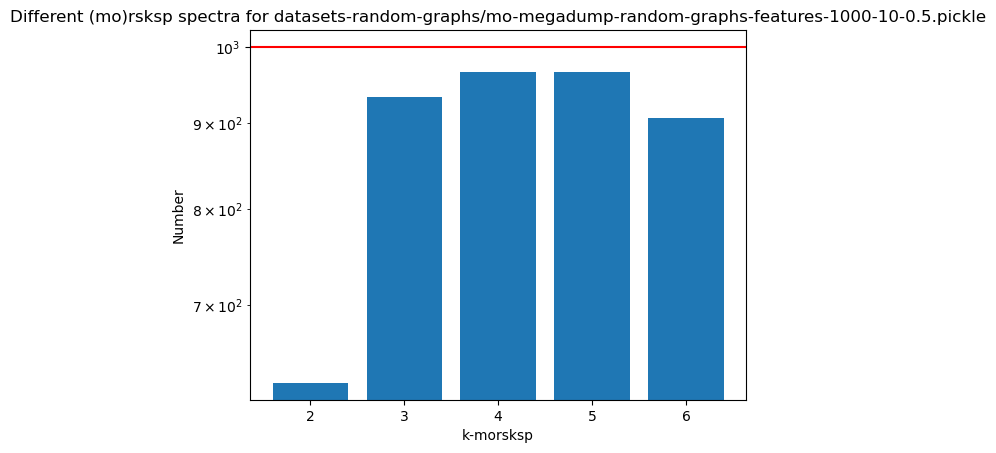

Dataset path:  dataset-combinatorial-graphs/graph6.g6-skew.pickle
Number of total graphs:  156
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
1orbit-2-corre-dict - comp. dist -  (finished clustering)
1orbit-3-corre-dict - comp. dist -  (finished clustering)
1orbit-4-corre-dict - comp. dist -  (finished clustering)
1orbit-5-corre-dict - comp. dist -  (finished clustering)
1orbit-6-corre-dict - comp. dist -  (finished clustering)
1orbit-7-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 753, number of nodes in the BFS: 753
Number of edges in original graph: 762, number of edgs in the BFS: 752
We have 0 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'1orbit-0-corre-dict': 142,
 '1orbit-2-corre-dict': 26,
 '1orbit-3-corre-dict': 0,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0,
 '1orbit-7-corre-dict': 0}


The lottery tickets ar

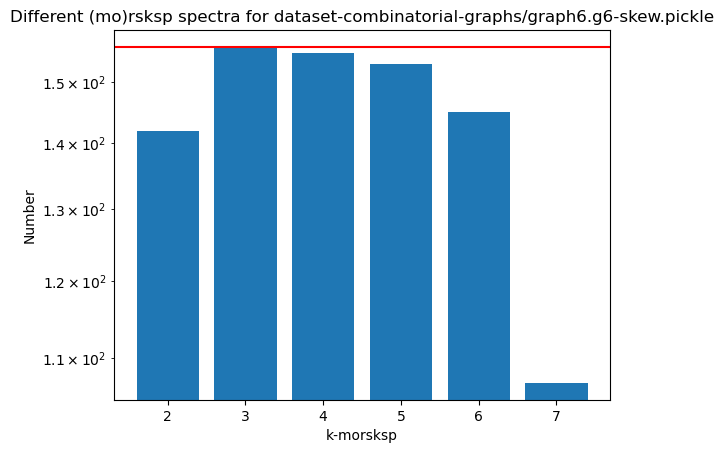

Dataset path:  dataset-combinatorial-graphs/graph7.g6-skew.pickle
Number of total graphs:  1044
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
1orbit-2-corre-dict - comp. dist -  (finished clustering)
1orbit-3-corre-dict - comp. dist -  (finished clustering)
1orbit-4-corre-dict - comp. dist -  (finished clustering)
1orbit-5-corre-dict - comp. dist -  (finished clustering)
1orbit-6-corre-dict - comp. dist -  (finished clustering)
1orbit-7-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 4868, number of nodes in the BFS: 4868
Number of edges in original graph: 4882, number of edgs in the BFS: 4867
We have 2 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'1orbit-0-corre-dict': 712,
 '1orbit-2-corre-dict': 518,
 '1orbit-3-corre-dict': 4,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0,
 '1orbit-7-corre-dict': 0}


The lottery tick

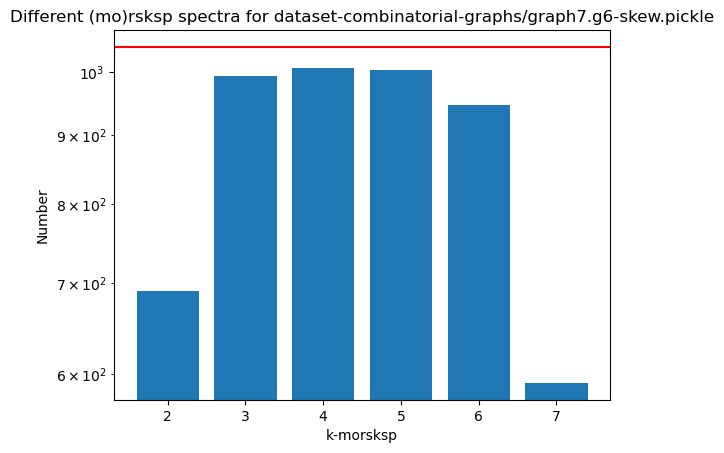

Dataset path:  dataset-combinatorial-graphs/eul9c.g6-mo-rsksp.pickle
Number of total graphs:  1782
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
2orbit-2-corre-dict - comp. dist -  (finished clustering)
2orbit-3-corre-dict - comp. dist -  (finished clustering)
2orbit-4-corre-dict - comp. dist -  (finished clustering)
2orbit-5-corre-dict - comp. dist -  (finished clustering)
2orbit-6-corre-dict - comp. dist -  (finished clustering)
2orbit-7-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 4950, number of nodes in the BFS: 4950
Number of edges in original graph: 4951, number of edgs in the BFS: 4949
We have 124 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'2orbit-0-corre-dict': 280,
 '2orbit-2-corre-dict': 957,
 '2orbit-3-corre-dict': 269,
 '2orbit-4-corre-dict': 0,
 '2orbit-5-corre-dict': 0,
 '2orbit-6-corre-dict': 0,
 '2orbit-7-corre-dict': 0}


The lotte

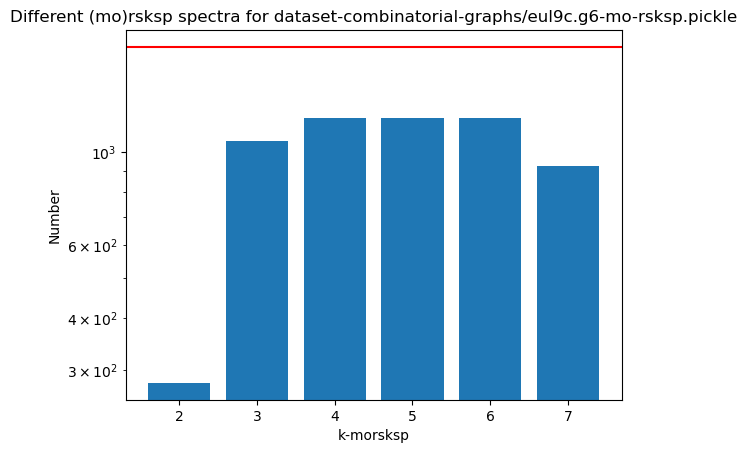

Dataset path:  dataset-combinatorial-graphs/eul9c.g6-so-rsksp.pickle
Number of total graphs:  1782
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
1orbit-2-corre-dict - comp. dist -  (finished clustering)
1orbit-3-corre-dict - comp. dist -  (finished clustering)
1orbit-4-corre-dict - comp. dist -  (finished clustering)
1orbit-5-corre-dict - comp. dist -  (finished clustering)
1orbit-6-corre-dict - comp. dist -  (finished clustering)
1orbit-7-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 4950, number of nodes in the BFS: 4950
Number of edges in original graph: 4951, number of edgs in the BFS: 4949
We have 124 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'1orbit-0-corre-dict': 280,
 '1orbit-2-corre-dict': 957,
 '1orbit-3-corre-dict': 269,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0,
 '1orbit-7-corre-dict': 0}


The lotte

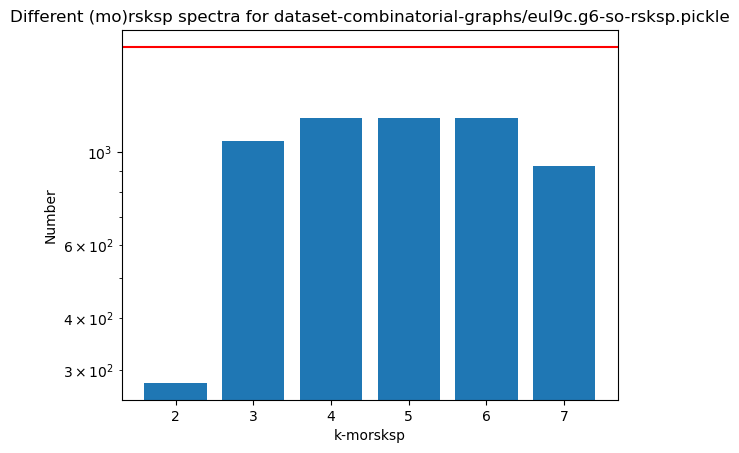

Dataset path:  dataset-combinatorial-graphs/highlyirregular14.g6-so-rsksp.pickle
Number of total graphs:  2545
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
1orbit-2-corre-dict - comp. dist -  (finished clustering)
1orbit-3-corre-dict - comp. dist -  (finished clustering)
1orbit-4-corre-dict - comp. dist -  (finished clustering)
1orbit-5-corre-dict - comp. dist -  (finished clustering)
1orbit-6-corre-dict - comp. dist -  (finished clustering)
1orbit-7-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 220, number of nodes in the BFS: 220
Number of edges in original graph: 251, number of edgs in the BFS: 219
We have 7 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'1orbit-0-corre-dict': 14,
 '1orbit-2-corre-dict': 56,
 '1orbit-3-corre-dict': 14,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0,
 '1orbit-7-corre-dict': 0}


The lo

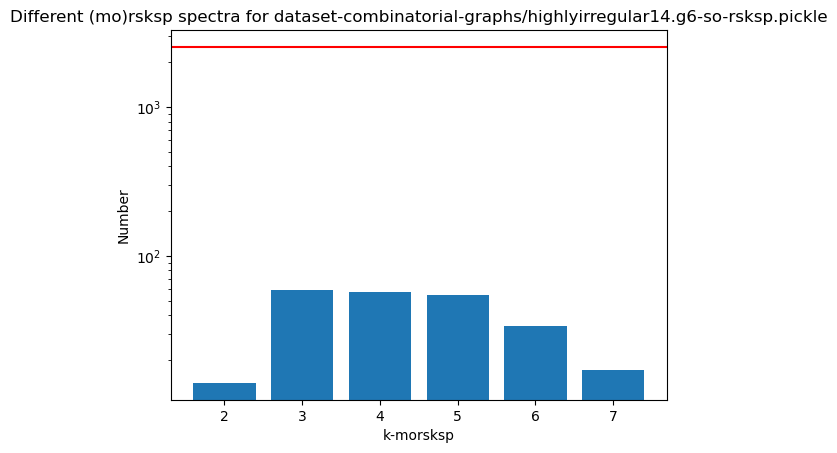

Dataset path:  dataset-combinatorial-graphs/highlyirregular14.g6-mo-rsksp.pickle
Number of total graphs:  2545
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
2orbit-2-corre-dict - comp. dist -  (finished clustering)
2orbit-3-corre-dict - comp. dist -  (finished clustering)
2orbit-4-corre-dict - comp. dist -  (finished clustering)
2orbit-5-corre-dict - comp. dist -  (finished clustering)
2orbit-6-corre-dict - comp. dist -  (finished clustering)
2orbit-7-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 220, number of nodes in the BFS: 220
Number of edges in original graph: 251, number of edgs in the BFS: 219
We have 7 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'2orbit-0-corre-dict': 14,
 '2orbit-2-corre-dict': 56,
 '2orbit-3-corre-dict': 14,
 '2orbit-4-corre-dict': 0,
 '2orbit-5-corre-dict': 0,
 '2orbit-6-corre-dict': 0,
 '2orbit-7-corre-dict': 0}


The lo

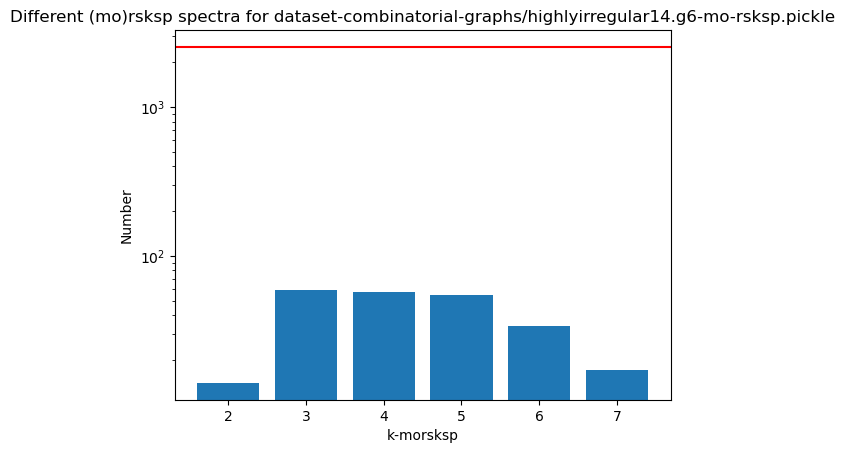

Dataset path:  dataset-combinatorial-graphs/planar_conn.6.g6-mo-rsksp.pickle
Number of total graphs:  99
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
2orbit-2-corre-dict - comp. dist -  (finished clustering)
2orbit-3-corre-dict - comp. dist -  (finished clustering)
2orbit-4-corre-dict - comp. dist -  (finished clustering)
2orbit-5-corre-dict - comp. dist -  (finished clustering)
2orbit-6-corre-dict - comp. dist -  (finished clustering)
2orbit-7-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 486, number of nodes in the BFS: 486
Number of edges in original graph: 485, number of edgs in the BFS: 485
We have 0 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'2orbit-0-corre-dict': 89,
 '2orbit-2-corre-dict': 18,
 '2orbit-3-corre-dict': 0,
 '2orbit-4-corre-dict': 0,
 '2orbit-5-corre-dict': 0,
 '2orbit-6-corre-dict': 0,
 '2orbit-7-corre-dict': 0}


The lottery t

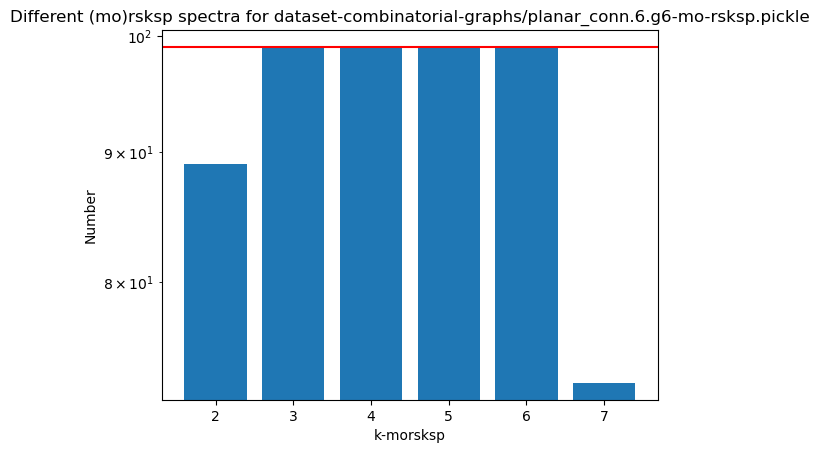

Dataset path:  dataset-combinatorial-graphs/planar_conn.6.g6-so-rsksp.pickle
Number of total graphs:  99
Number of isomorphic grpahs 0
They are:
[]
Creating table T (slow)
1orbit-2-corre-dict - comp. dist -  (finished clustering)
1orbit-3-corre-dict - comp. dist -  (finished clustering)
1orbit-4-corre-dict - comp. dist -  (finished clustering)
1orbit-5-corre-dict - comp. dist -  (finished clustering)
1orbit-6-corre-dict - comp. dist -  (finished clustering)
1orbit-7-corre-dict - comp. dist -  (finished clustering)
Creating graph G
Creating BFS from G
Number of nodes in original graph: 486, number of nodes in the BFS: 486
Number of edges in original graph: 485, number of edgs in the BFS: 485
We have 0 lottery tickets, i.e. nodes with a split at depth k>3 


Historgram of bifurcations
{'1orbit-0-corre-dict': 89,
 '1orbit-2-corre-dict': 18,
 '1orbit-3-corre-dict': 0,
 '1orbit-4-corre-dict': 0,
 '1orbit-5-corre-dict': 0,
 '1orbit-6-corre-dict': 0,
 '1orbit-7-corre-dict': 0}


The lottery t

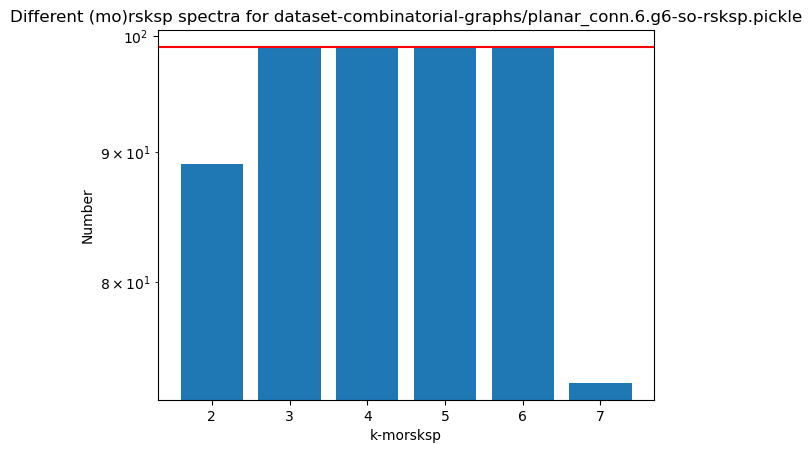

In [ ]:




### NOT WORKING: 'dataset-simple-graphs/graph8.g6-skew.pickle'
for dataset_path in  [#'dataset-simple-graphs/graph9.g6-skew.pickle',
                     'dataset-all-graphs/megadump-atlas_7.pickle', 
                     'datasets-random-graphs/so-megadump-random-graphs-features-1000-10-0.1.pickle',
                     'datasets-random-graphs/mo-megadump-random-graphs-features-1000-10-0.1.pickle',
                     'datasets-random-graphs/so-megadump-random-graphs-features-1000-10-0.5.pickle',
                     'datasets-random-graphs/mo-megadump-random-graphs-features-1000-10-0.5.pickle',
                     'dataset-combinatorial-graphs/graph6.g6-skew.pickle', 
                     'dataset-combinatorial-graphs/graph7.g6-skew.pickle', 
                     'dataset-combinatorial-graphs/eul9c.g6-mo-rsksp.pickle',
                     'dataset-combinatorial-graphs/eul9c.g6-so-rsksp.pickle',
                     'dataset-combinatorial-graphs/highlyirregular14.g6-so-rsksp.pickle',
                     'dataset-combinatorial-graphs/highlyirregular14.g6-mo-rsksp.pickle',
                     'dataset-combinatorial-graphs/planar_conn.6.g6-mo-rsksp.pickle',
                     'dataset-combinatorial-graphs/planar_conn.6.g6-so-rsksp.pickle',
                     ]: 

    print("Dataset path: ", dataset_path)
    handle = open(dataset_path, 'rb')
    raw_dataset = pickle.load(handle)
    handle.close()

    try: 
        dataset = raw_dataset[1]

        kcorre_names = raw_dataset[1].keys()
        max_k = HCF.find_maximum_number(kcorre_names)
        
    except Exception as e:
        print("exception: ", e)
        dataset = dataset

    #### POLLUTE WITH NON-ISOMORPHIC
    #raw_dataset = HCF.pollute_with_isomorphic_graphs(raw_dataset, 40, kcorre_names)



    ### COMPUTE NON ISOMORPHIC GRAPS vs GRAPHS RATIO
    total_graphs = len(raw_dataset[0])

    print("Number of total graphs: ", total_graphs)


    if total_graphs < 10000:
        isomorphic_graphs = HCF.find_isomorphic_graphs(raw_dataset[0])
        print("Number of isomorphic grpahs", len(isomorphic_graphs))
        print("They are:")
        pprint.pprint(isomorphic_graphs)
    else: 
        print("Too many graphs to compute the isomorphic graphs")


    ###### CREATE TABLE WIHT TWO METHODS
    # Are you sure you want to run this? Very slow. 
    if total_graphs < 30000:
        print("Creating table T (slow)")
        T = HCF.create_T_table_2(dataset, kcorre_names)
    else:
        print("Too many graphs to compute the table with the slow method")
        break


    # Fast algorithm 
    #print("Creating table T (fast)")
    #T = HCF.create_T_table(dataset, kcorre_names) # TODO MAYBE WE SHOULD TRUNCATE INSIDE THIS FUNCTION


    ##### CREATE GRAPH FROM TABLE
    print("Creating graph G")
    G = HCF.build_networkx_graph(T, maxk=5)
    #G = HCF.build_networkx_graph(T_test, maxk=5)

    #### TESTING EVEN FURTHER THE EQUIVALENCE BETWEEN THE TWO GRAPHS
    #print(nx.is_isomorphic(G, G_test))

    #### COMPUTE BFS FROM original graph
    print("Creating BFS from G")
    G_bfs = nx.bfs_tree(G, (0,0))
    print("Number of nodes in original graph: {}, number of nodes in the BFS: {}".format(G.number_of_nodes(), G_bfs.number_of_nodes()))
    print("Number of edges in original graph: {}, number of edgs in the BFS: {}".format(G.number_of_edges(), G_bfs.number_of_edges()))


    histogram, hits, lottery_tickets = HCF.count_bifurcations(G, kcorre_names)       

    print("We have {} lottery tickets, i.e. nodes with a split at depth k>3 \n\n".format(len(lottery_tickets)))
    print("Historgram of bifurcations")
    pprint.pprint(histogram)


    try:
        lottery_ticket = random.choice(lottery_tickets)
    except Exception as e:
        pass

    print("\n\nThe lottery tickets are:")
    print(lottery_tickets)



    number_differe_kredskew = []
    for kcorre_name in kcorre_names:
        number_differe_kredskew.append(len(set(tuple(np.round(row, decimals=3)) for row in dataset[kcorre_name])))

    print("Number of differen (mo)krsksp: {}".format(number_differe_kredskew))

    ks = [k[7] for k in list(kcorre_names)]
    print(ks)
    plt.bar(ks, number_differe_kredskew)
        
    plt.axhline(y = total_graphs, color = 'r', linestyle = '-')     # non isomorphic graphs set at the beginning of the notebook

    plt.xlabel('k-morsksp')
    plt.ylabel('Number')
    plt.yscale("log") 
    plt.title('Different (mo)rsksp spectra for {}'.format(dataset_path))
    plt.savefig('plots/{}.png'.format(dataset_path.split('/')[-1]), dpi=300, bbox_inches='tight')

    plt.show()


In [ ]:
lottery_tickets
for node in G:
    if len(node) > 2 and node[0] == 3:    
        print("collision for k =4:", node)

#print(raw_dataset[0][0].edges())
#print(raw_dataset[0][1].edges())

print(raw_dataset[0][417].edges())


print(raw_dataset[1]['1orbit-4-corre-dict'][0])
print(raw_dataset[1]['1orbit-4-corre-dict'][1])

NameError: name 'lottery_tickets' is not defined

In [ ]:
import sys
import networkx as nx

sys.path.append("..")
sys.path.append('/Users/scinawa/workspace/grouptheoretical/multi-orbit-bispectrum-main/')
from spectrum_utils import * 
from utils import *



# Create the first graph with no edges
graph1 = nx.Graph()

# Add 11 nodes to the graph
graph1.add_nodes_from(range(1, 12))

# Create the second graph with one edge connecting node 5 and 6
graph2 = nx.Graph()

# Add 11 nodes to the graph
graph2.add_nodes_from(range(1, 12))

# Add an edge between node 5 and 6
graph2.add_edge(5, 6)




skew_spectrums_ = {}
for k in range(2,8):
    skew_spectrums_["1orbit-{}-corre-dict".format(k)]=[]
    skew_spectrums_["2orbit-{}-corre-dict".format(k)]=[]


np_graph1 = nx.to_numpy_array(graph1)
np_graph2 = nx.to_numpy_array(graph2)

for k in range(2,7):
    print("Creating {}-th correlation".format(k))


    if 0:
        func_1 = create_func_on_group_from_matrix_2orbit(np.array(np_graph1))
        func_2 = create_func_on_group_from_matrix_2orbit(np.array(np_graph2))
        skew_spectrums_["2orbit-{}-corre-dict".format(k)].append(
            reduced_k_correlation(func_1, k=k, method="extremedyn", vector=True))
        skew_spectrums_["2orbit-{}-corre-dict".format(k)].append(
            reduced_k_correlation(func_2, k=k, method="extremedyn", vector=True))       



    else:
        func_1 = create_func_on_group_from_matrix_1orbit(np.array(np_graph1))
        func_2 = create_func_on_group_from_matrix_1orbit(np.array(np_graph2))
        skew_spectrums_["2orbit-{}-corre-dict".format(k)].append(
            reduced_k_correlation(func_1, k=k, method="extremedyn", vector=True))
        skew_spectrums_["2orbit-{}-corre-dict".format(k)].append(
            reduced_k_correlation(func_2, k=k, method="extremedyn", vector=True))       
        


Creating 2-th correlation
Creating 3-th correlation
Creating 4-th correlation
Creating 5-th correlation
Creating 6-th correlation


In [ ]:
skew_spectrums_["2orbit-6-corre-dict"]

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [ ]:
- THINGS TO DEBUG

i random graph sono PEGGIO con multi orbits!!!
MO
#[629, 933, 966, 966, 906]

SO
[651, 945, 971, 967, 903]

TODO Actually rifallo su gli stessi grafi!!!! 







### FOR EULER MO AND SO ARE THE SAME


Dataset path:  dataset-combinatorial-graphs/eul9c.g6-so-rsksp.pickle
Number of total graphs:  1782
Historgram of bifurcations
{'1orbit-0-corre-dict': 280,
 '1orbit-2-corre-dict': 957,
 '1orbit-3-corre-dict': 269,
 '1orbit-4-corre-dict': 0,
...




Number of differen (mo)krsksp: [280, 1059, 1204, 1204, 1202, 926]
['2', '3', '4', '5', '6', '7']





Dataset path:  dataset-combinatorial-graphs/eul9c.g6-mo-rsksp.pickle
Number of total graphs:  1782

Historgram of bifurcations
{'2orbit-0-corre-dict': 280,
 '2orbit-2-corre-dict': 957,
 '2orbit-3-corre-dict': 269,
 '2orbit-4-corre-dict': 0,
...


Number of differen (mo)krsksp: [280, 1059, 1204, 1204, 1202, 926]
['2', '3', '4', '5', '6', '7']
